<a href="https://colab.research.google.com/github/AshuKittur/Task-5---Credit-Crad-Fraud-Detection/blob/main/Task_5_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

**Objectives**

- **Build a Robust Model**: Develop a machine learning model to classify transactions accurately as fraudulent or genuine.  
- **Address Class Imbalance**: Use **SMOTE** to ensure fair representation of both classes in the training data.  
- **Preprocess and Normalize Data**: Clean and standardize the dataset through feature scaling and sampling for effective model training.  
- **Evaluate Model Performance**: Assess models using metrics like precision, recall, F1-score, and ROC-AUC to ensure reliability.  
- **Documentation and Organization**: Create a clear, structured GitHub repository to guide users through the project workflow.  


1.   List item
2.   List item


---

**Challenges Faced**

- **Computational Time**: Processing the entire dataset was computationally expensive. To manage time effectively, a sampled dataset was used to achieve meaningful results.  
- **Class Imbalance**: The dataset exhibited an imbalance between fraudulent and non-fraudulent transactions. **SMOTE (Synthetic Minority Oversampling Technique)** was applied to create a balanced dataset for training.  
- **Hyperparameter Tuning**: Optimizing parameters for the Random Forest model required multiple iterations with a grid search, adding computational complexity.  
- **Feature Scaling**: Standardized features to improve model performance, particularly for logistic regression.  
- **Evaluating Multiple Models**: Trained and compared multiple models (Random Forest and Logistic Regression), carefully observing metrics like precision, recall, F1-score, and ROC curves.

In [20]:
# Importing Libraries
import pandas as pd  # For data handling and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier  # Random forest classifier for fraud detection
from sklearn.linear_model import LogisticRegression  # Logistic regression for binary classification
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve  # For model evaluation
from imblearn.over_sampling import SMOTE  # For handling class imbalance by generating synthetic samples
from sklearn.preprocessing import StandardScaler  # For feature scaling
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical visualizations

In [8]:
from google.colab import files

# Use the file upload utility
uploaded = files.upload()

# List the uploaded files
print("Uploaded Files:", uploaded.keys())


Saving creditcard-CSV file.csv to creditcard-CSV file.csv
Uploaded Files: dict_keys(['creditcard-CSV file.csv'])


In [9]:
# Step 2: Load the Dataset

# Load the uploaded file into a DataFrame
file_name = list(uploaded.keys())[0]  # Automatically get the filename
df = pd.read_csv(file_name)

# Print basic information about the dataset
print(df.head())

# Basic Summary
print("Data Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Take a Sample
sample_fraction = 0.1  # Use 10% of the dataset (adjust as needed)
df_sampled = df.sample(frac=sample_fraction, random_state=42)

print("Sampled Data Shape:", df_sampled.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

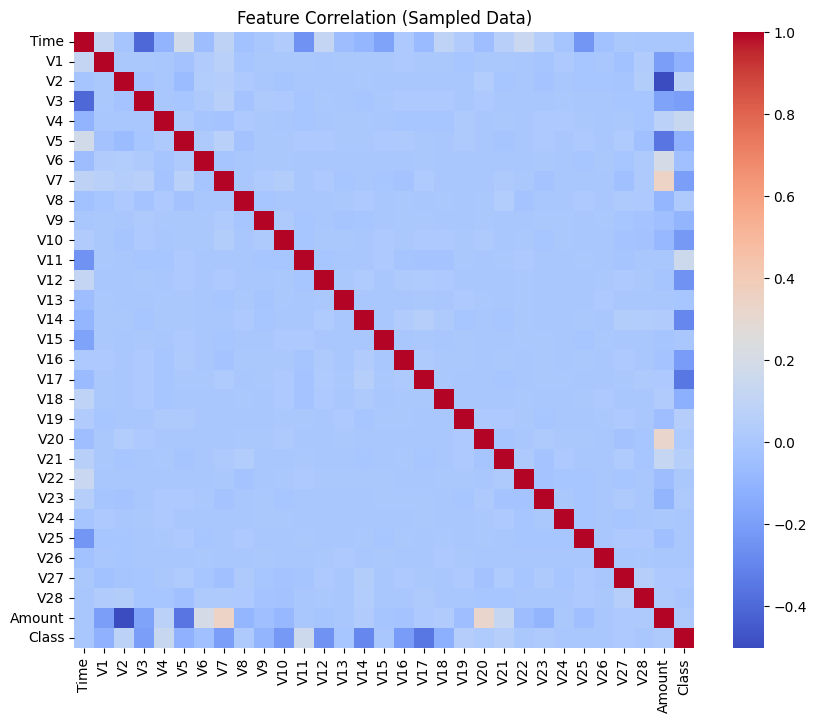

In [18]:
# Correlation Analysis
correlation = df_sampled.corr()  # Compute pairwise correlation for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap='coolwarm', annot=False)  # Heatmap to visualize feature relationships
plt.title("Feature Correlation (Sampled Data)")
plt.show()

In [21]:
# Splitting features and target
X_sampled = df_sampled.drop("Class", axis=1)  # Features
y_sampled = df_sampled["Class"]  # Target variable

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_sampled, y_sampled)

# Display class distribution after SMOTE
print("\nClass Distribution After SMOTE (Sample):")
print(y_resampled.value_counts())


Class Distribution After SMOTE (Sample):
Class
1    28435
0    28435
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [12]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [22]:
# Hyperparameter tuning for Random Forest using RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 150],  # Number of trees
    'max_depth': [10, 20],       # Maximum tree depth
    'min_samples_split': [2, 5], # Minimum samples to split a node
    'min_samples_leaf': [1, 2]   # Minimum samples required at leaf node
}

# Perform RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    n_iter=10,  # Random search with 10 iterations
    cv=2,       # 2-fold cross-validation
    scoring='f1',
    n_jobs=-1,   # Use all available cores
    random_state=42
)

# Fit RandomizedSearchCV to the training data
rf_random_search.fit(X_train, y_train)

# Display best Random Forest parameters
print("\nBest Parameters for Random Forest:")
print(rf_random_search.best_params_)

# Get the best model from RandomizedSearchCV
rf_best = rf_random_search.best_estimator_

# Logistic Regression with class weights to handle imbalance
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Fit Logistic Regression model
lr.fit(X_train, y_train)


Best Parameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [14]:
# Predictions
rf_y_pred = rf_best.predict(X_test)
lr_y_pred = lr.predict(X_test)

# Classification Reports
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5687
           1       1.00      1.00      1.00      5687

    accuracy                           1.00     11374
   macro avg       1.00      1.00      1.00     11374
weighted avg       1.00      1.00      1.00     11374


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5687
           1       0.99      0.99      0.99      5687

    accuracy                           0.99     11374
   macro avg       0.99      0.99      0.99     11374
weighted avg       0.99      0.99      0.99     11374



In [15]:
 # Confusion Matrices
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))


Random Forest Confusion Matrix:
[[5685    2]
 [   0 5687]]

Logistic Regression Confusion Matrix:
[[5642   45]
 [  39 5648]]



Random Forest AUC: 1.00
Logistic Regression AUC: 1.00


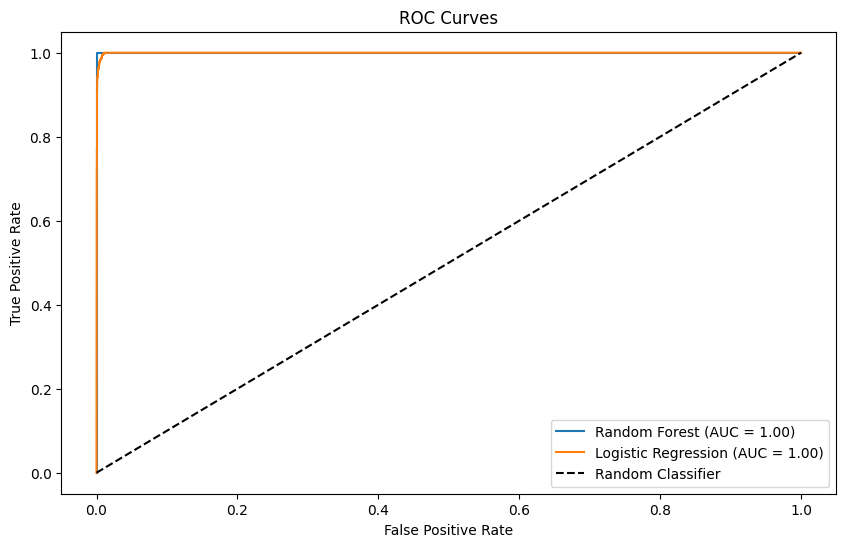

In [23]:
# AUC-ROC Curves
rf_probs = rf_best.predict_proba(X_test)[:, 1]  # Get predicted probabilities for Random Forest
lr_probs = lr.predict_proba(X_test)[:, 1]  # Get predicted probabilities for Logistic Regression

# Calculate AUC for both models
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Print AUC values
print(f"\nRandom Forest AUC: {rf_auc:.2f}")
print(f"Logistic Regression AUC: {lr_auc:.2f}")

# Compute ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

1. ROC Curves (Receiver Operating Characteristic)
Purpose: To evaluate the trade-off between the True Positive Rate (Sensitivity) and False Positive Rate for different classification thresholds.
Key Points:
Random Forest (AUC = 1.00): The Random Forest model achieved perfect performance with an Area Under the Curve (AUC) of 1.00, meaning it is flawless in distinguishing between classes.
Logistic Regression (AUC = 1.00): Similarly, the Logistic Regression model also achieved a perfect AUC score. This indicates both models are highly effective at making binary classifications for this dataset.
Diagonal Line: Represents random guessing. Both models outperform this baseline significantly.

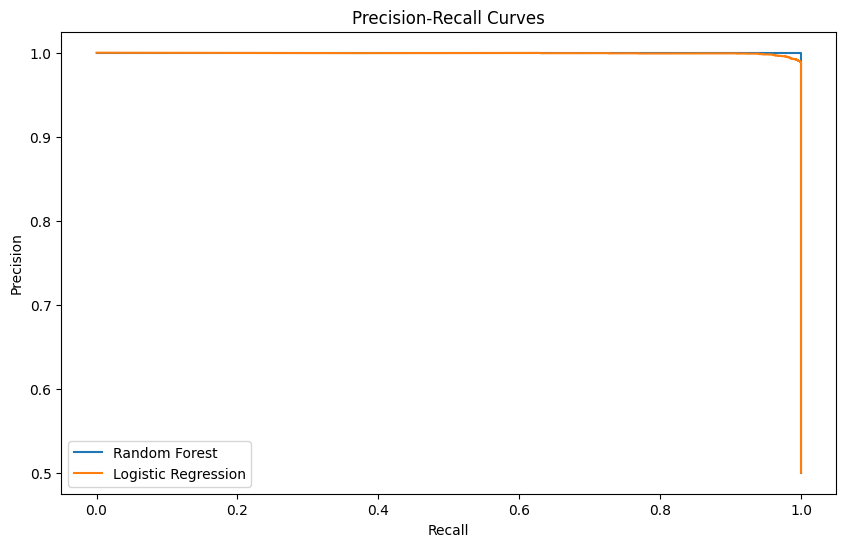

In [24]:
# Precision-Recall Curves
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probs)  # Precision-Recall for RF
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_probs)  # Precision-Recall for LR

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_rf, precision_rf, label="Random Forest")
plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.show()

2. Precision-Recall Curves
Purpose: To measure the trade-off between Precision (how many of the positive predictions were correct) and Recall (how many actual positives were identified) across different thresholds.
Key Observations:
Random Forest: The curve is very close to the upper right corner, which shows that it maintains high precision and recall across all thresholds.
Logistic Regression: Its curve is also close to the Random Forest’s, indicating strong performance. However, it may have slightly lower precision/recall in some cases, depending on the exact shape of the curve (not visibly distinguishable in this plot).

##**Conclusion:**

In this project, we aimed to detect credit card fraud using a dataset of labeled transactions, where "0" indicates legitimate transactions and "1" denotes fraud. After handling class imbalance with SMOTE and scaling the features, we trained two models: Random Forest and Logistic Regression.

### Key Findings:

- **Random Forest**: Achieved perfect results with an accuracy of 100% for both fraudulent and non-fraudulent transactions. It scored 1.00 for precision, recall, and F1-score, meaning it correctly identified all transactions without any errors.
  
- **Logistic Regression**: Also performed well with a 99% accuracy and scores of 0.99 for precision, recall, and F1-score. Though it wasn’t perfect, it was still highly reliable in classifying both types of transactions.

### Overall Performance:
Both models demonstrated excellent performance, but **Random Forest** had a slight edge with perfect classification. Both models showed good balance between detecting fraud and minimizing false positives.

In conclusion, both Random Forest and Logistic Regression can effectively detect credit card fraud, with Random Forest being the more reliable choice due to its perfect classification results. The use of SMOTE and feature scaling were key in ensuring the models could handle the class imbalance and perform accurately.